# Proyecto Analisis Hospitalario | EDA

---


El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.


### Importar librerias


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import utils as tl

### Carga del dataset


In [25]:
hospitals=pd.read_excel('BBDD_Hospitalización.xlsx')

### Se explora los tipos de datos de las columnas.


In [ ]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

### Visualizar la estructura del dataframe


In [ ]:
hospitals.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


Se eliminan las columnas de `DIAS HOSPITALIZACION MQ y DIAS HOSPITALIZACIÓN UPC` debido a que son columnas que no tienen ninguna relacion causal con la hospitalizacion, ademas la columna `AGENTE AISLADO` se elimina debido a que no es significativa para el analisis.


In [ ]:
hospitals.drop(['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','AGENTE AISLADO'],axis=1,inplace=True)

#### Se analiza la distribucion de las variables numericas y categoricas.


In [ ]:
hospitals_num=hospitals.select_dtypes(np.number)
hospitals_cat=hospitals.select_dtypes(object)

#### Variables Numericas:


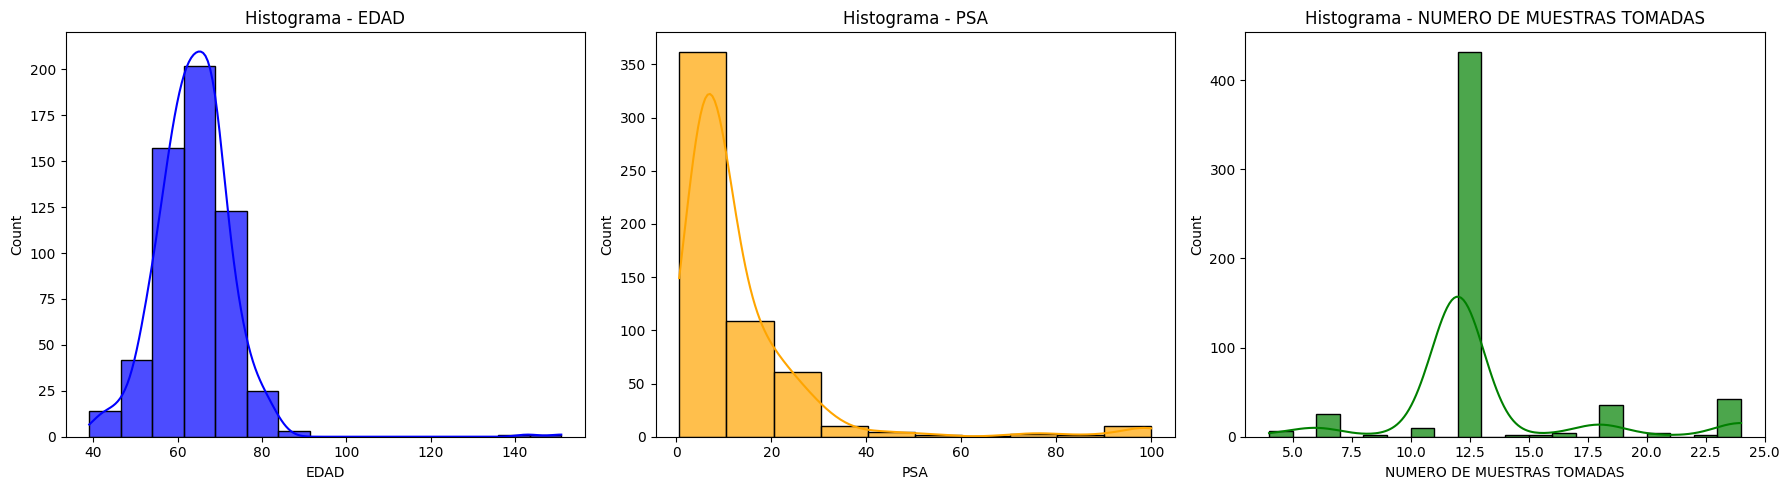

In [ ]:
# Crear una figura con una disposición de subplots de 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Histograma para la columna 'EDAD' con 15 bins
sns.histplot(data=hospitals_num, x="EDAD", kde=True, bins=15, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title("Histograma - EDAD")

# Plot 2: Histograma para la columna 'PSA' con 10 bins
sns.histplot(data=hospitals_num, x="PSA", kde=True, bins=10, color='orange', alpha=0.7, ax=axes[1])
axes[1].set_title("Histograma - PSA")

# Plot 3: Histograma para la columna 'NUMERO DE MUESTRAS TOMADAS' con 20 bins
sns.histplot(data=hospitals_num, x="NUMERO DE MUESTRAS TOMADAS", kde=True, bins=20, color='green', alpha=0.7, ax=axes[2])
axes[2].set_title("Histograma - NUMERO DE MUESTRAS TOMADAS")

# Ajustar el espacio entre los gráficos
plt.tight_layout()


observaciones:

- Histograma Edad: Tiene una distribucion normal si se reajusta los extremos mas representativos.
- Histograma PSA: Tiene una distribucion Asismetrica Positiva.
- Histograma Numero de Muestras(Tomadas): Tiene una distribucion leptocurtica marcada.


#### Variables Categoricas:


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?


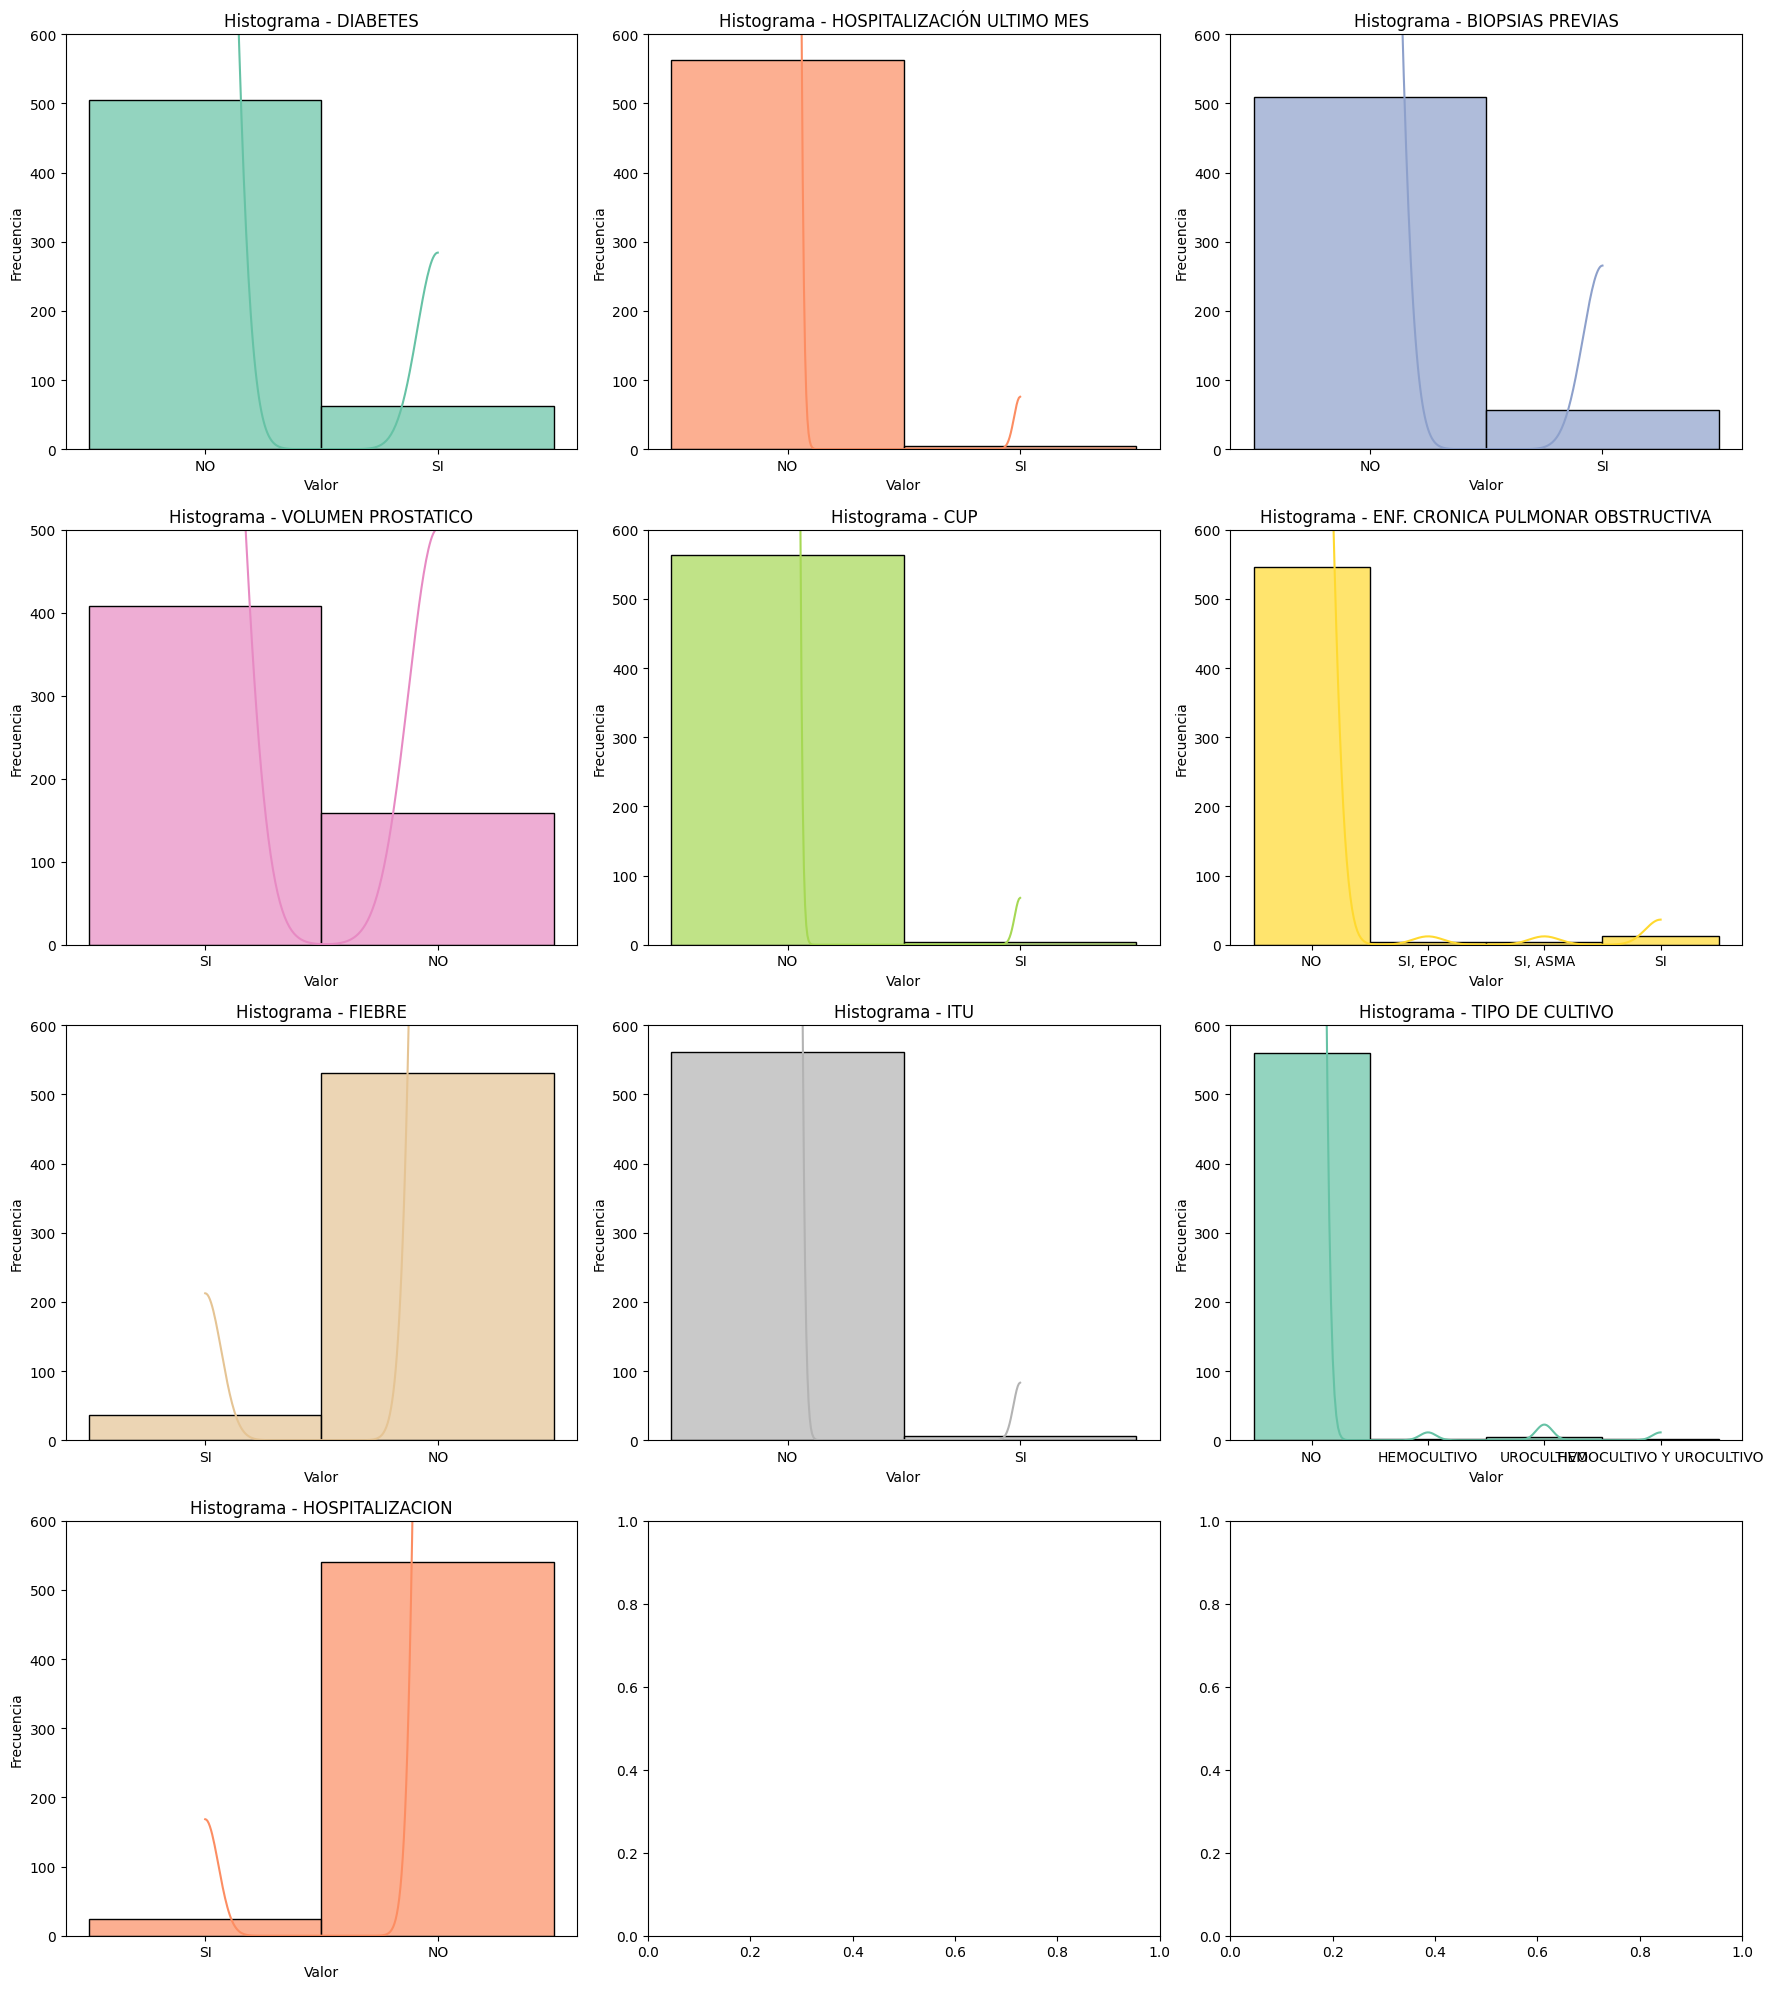

In [ ]:
# Lista de columnas para generar los histogramas
columnas = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
            'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
            'HOSPITALIZACION']

# Calcular el número total de subplots
num_plots = len(columnas)

# Calcular el número de filas y columnas para los subplots
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Definir una paleta de colores con colores distintos para cada histograma
colors = sns.color_palette('Set2', n_colors=num_plots)

# Definir el diccionario con los límites del eje y para cada columna
y_limits = {
    'DIABETES': (0, 600),
    'HOSPITALIZACIÓN ULTIMO MES': (0, 600),
    'BIOPSIAS PREVIAS': (0, 600),
    'VOLUMEN PROSTATICO': (0, 500),
    'CUP': (0, 600),
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': (0, 600),
    'FIEBRE': (0, 600),
    'ITU': (0, 600),
    'TIPO DE CULTIVO': (0, 600),
    'HOSPITALIZACION': (0, 600)
}

# Ajustar el tamaño de la figura (solo el alto)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

# Generar los histogramas para cada columna en un bucle for
for i, col in enumerate(columnas):
    row_idx = i // 3
    col_idx = i % 3
    sns.histplot(data=hospitals_cat, x=col, kde=True, bins=15, color=colors[i], alpha=0.7, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Histograma - {col}")
    axes[row_idx, col_idx].set_xlabel('Valor')
    axes[row_idx, col_idx].set_ylabel('Frecuencia')

    # Obtener los límites del eje y para la columna actual del diccionario
    y_min, y_max = y_limits[col]
    axes[row_idx, col_idx].set_ylim(y_min, y_max)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#### Se puede observar como todas las variables siguen una distribucion muy similar, donde se contabilizan mas 'No' que 'Si', exceptuandose 'VOLUMEN PROSTATICO'


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán.


In [ ]:
# Filtrar las filas con al menos un valor nulo (NaN) en el DataFrame hospitals
hospitals[hospitals.isnull().any(axis=1)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,SI
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO
100,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO
109,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NaN
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO


In [ ]:
# Eliminar los registros con ID 5 y 
hospitals = hospitals.drop(index=[568,569])

In [ ]:
# Crear una máscara booleana para los registros donde el valor de 'PSA' es mayor que 10
mask = hospitals['PSA'] > 10

# Obtener la cantidad de registros que cumplen con la condición
num_records = hospitals[mask].shape[0]

# Imprimir el resultado
print(f"Total de registros donde PSA > 10: {num_records}")


Total de registros donde PSA > 10: 206


In [ ]:
for column in hospitals.columns:
    print(f'{hospitals[column].isna().sum()} valores nulos presentes en {column}')

0 valores nulos presentes en EDAD
0 valores nulos presentes en DIABETES
0 valores nulos presentes en HOSPITALIZACIÓN ULTIMO MES
4 valores nulos presentes en PSA
2 valores nulos presentes en BIOPSIAS PREVIAS
1 valores nulos presentes en VOLUMEN PROSTATICO
0 valores nulos presentes en ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
0 valores nulos presentes en NUMERO DE MUESTRAS TOMADAS
1 valores nulos presentes en CUP
2 valores nulos presentes en ENF. CRONICA PULMONAR OBSTRUCTIVA
0 valores nulos presentes en BIOPSIA
0 valores nulos presentes en NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
0 valores nulos presentes en FIEBRE
0 valores nulos presentes en ITU
0 valores nulos presentes en TIPO DE CULTIVO
0 valores nulos presentes en PATRON DE RESISTENCIA
3 valores nulos presentes en HOSPITALIZACION


Se observan que columnas que hay pocos registros con valores nulos, estos no superan el 3 porciento. por lo tanto se imputaran estos campos por la media o la moda segun corresponda para el tipo de variable.


---

### Imputacion


#### Se cambia el Nombre de la columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' a 'PRESENTÓ COMPLICACIÓN INFECCIOSA' para facilitar la comprension y se normaliza la columna


In [ ]:
hospitals.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'PRESENTÓ COMPLICACIÓN INFECCIOSA'}, inplace=True)
hospitals.loc[hospitals['PRESENTÓ COMPLICACIÓN INFECCIOSA'] != 'NO', 'PRESENTÓ COMPLICACIÓN INFECCIOSA'] = 'SI'

#### Columna EDAD:

- Dado a que considero que los valores que estan por encima de 100 son errores de carga.Decidi que del rango de 100 hasta el valor maximo,se imputara por la media de los datos.


In [ ]:
# Función para imputar valores mayores a 130 en una columna con la mediana
def fillna_median_above_threshold(column, threshold):
    median = column.loc[column > threshold].median()
    return column.where(column <= threshold, median)

# Convertir la columna 'Edad' a tipo entero (int)
hospitals['EDAD'] = hospitals['EDAD'].astype(int)

# Imputar los valores mayores a 130 en la columna 'Edad' con la mediana
hospitals['EDAD'] = fillna_median_above_threshold(hospitals['EDAD'], threshold=100)



#### Columna PSA:


In [ ]:
# Paso 1: Calcular el promedio de la columna 'PSA' sin incluir los valores NaN
psa_mean = hospitals['PSA'].mean()

# Paso 2: Llenar los valores NaN en la columna 'PSA' con el promedio calculado
hospitals['PSA'].fillna(psa_mean, inplace=True)

#### Columna BIOPSIAS PREVIAS


In [ ]:
# Calcular el valor más probable (moda) en la columna 'BIOPSIAS PREVIAS'
mode_value = hospitals['BIOPSIAS PREVIAS'].mode()[0]

# Rellenar los valores nulos con la moda
hospitals['BIOPSIAS PREVIAS'].fillna(mode_value, inplace=True)

#### Columna VOLUMEN PROSTATICO


In [ ]:
# Calcular el valor más probable (moda) en la columna 'BIOPSIAS PREVIAS'
mode_value = hospitals['VOLUMEN PROSTATICO'].mode()[0]

# Rellenar los valores nulos con la moda
hospitals['VOLUMEN PROSTATICO'].fillna(mode_value, inplace=True)

#### Columna CUP:


In [ ]:
# Calcular el valor más probable (moda) en la columna 'BIOPSIAS PREVIAS'
mode_value = hospitals['CUP'].mode()[0]

# Rellenar los valores nulos con la moda
hospitals['CUP'].fillna(mode_value, inplace=True)

#### Columna ENF. CRONICA PULMONAR OBSTRUCTIVA


In [ ]:
# Calcular el valor más probable (moda) en la columna 'BIOPSIAS PREVIAS'
mode_value = hospitals['ENF. CRONICA PULMONAR OBSTRUCTIVA'].mode()[0]

# Rellenar los valores nulos con la moda
hospitals['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna(mode_value, inplace=True)

#### Columna HOSPITALIZACION:


In [ ]:
# Calcular el valor más probable (moda) en la columna 'BIOPSIAS PREVIAS'
mode_value = hospitals['HOSPITALIZACION'].mode()[0]

# Rellenar los valores nulos con la moda
hospitals['HOSPITALIZACION'].fillna(mode_value, inplace=True)

---

### Transformaciones para el Modelo


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización.


In [ ]:
#Copia del dataframe limpio
hospitals_cleaned=hospitals.copy()

### Codificación

En utils.py se creó una función "label_encode_columns", la cual hace uso de la funcion LabelEncoder de sklearn para codificar las columnas categóricas y que, además, devuelve un diccionario con las codificaciones hechas. Por cada columna, a cada categoría se le asignó un número que va desde 0 hasta N número de Categorías en la Columna.


In [ ]:
category_cols = list(hospitals.select_dtypes(include=['object']).columns)
encoding_dict = tl.label_encode_columns(hospitals, category_cols)

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = hospitals.corr()

# Crear un heatmap (mapa de calor) para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajustar el estilo del título
title_font = {'size': 16, 'weight': 'bold', 'verticalalignment': 'baseline'}
plt.title("Diagrama de correlación de todas las variables", fontdict=title_font)

# Mostrar el heatmap
plt.show()

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?


---

### CSV listo para el Modelo.


Exporto


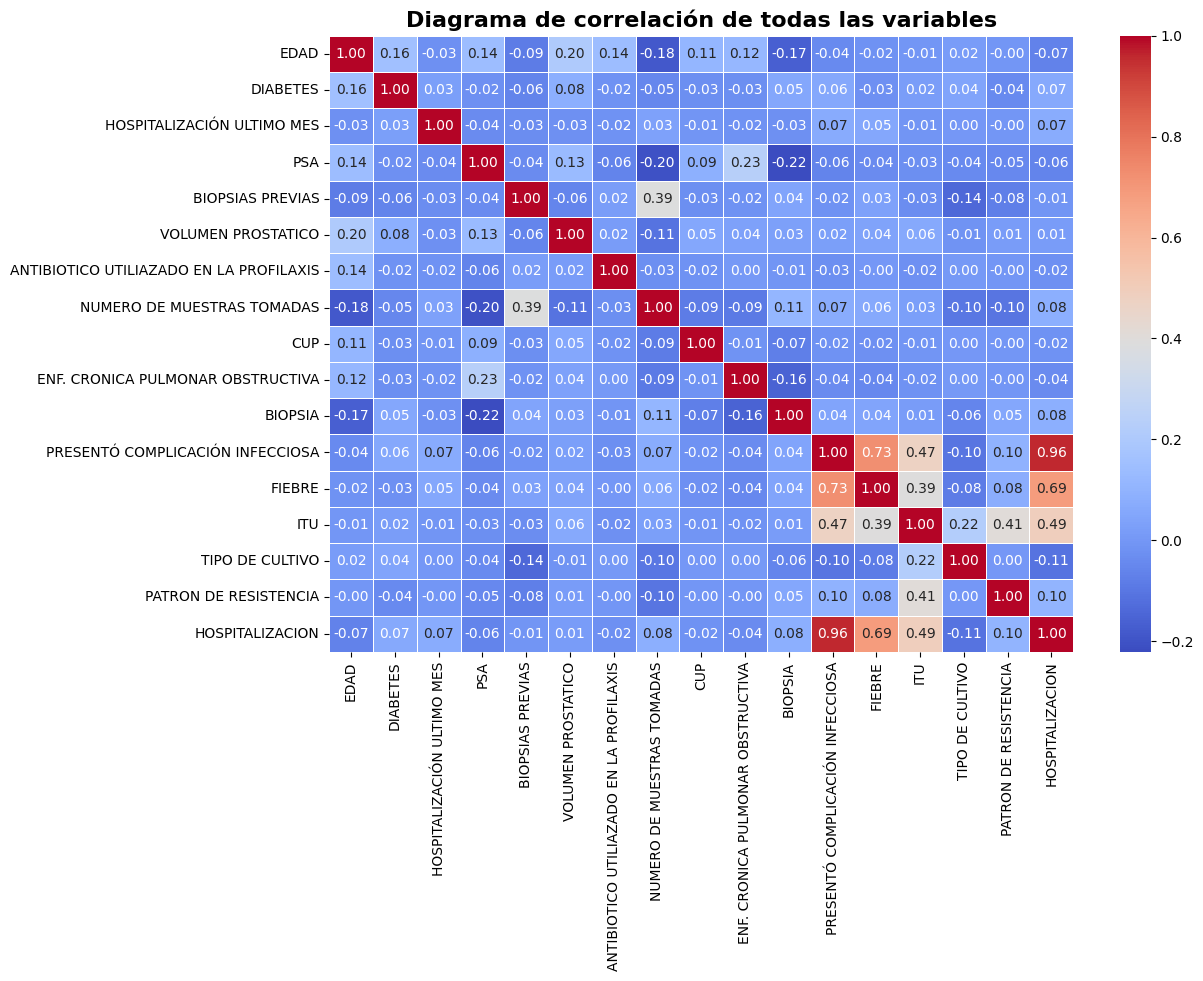

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = hospitals.corr()

# Crear un heatmap (mapa de calor) para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajustar el estilo del título
title_font = {'size': 16, 'weight': 'bold', 'verticalalignment': 'baseline'}
plt.title("Diagrama de correlación de todas las variables", fontdict=title_font)

# Mostrar el heatmap
plt.show()